# Datos publicos Temperatura Mínima del Aire
Temperatura mínima del aire a 2 metros. Datos crudos provenientes de sensores de estaciones automáticas del IDEAM y terceros. Se ofrecen como datos abiertos para gestión de riesgos, sin validación oficial, posibles errores e inconsistencias. Su uso e interpretación son responsabilidad del usuario, sin valor jurídico ni justificación posterior del IDEAM. 
<center>

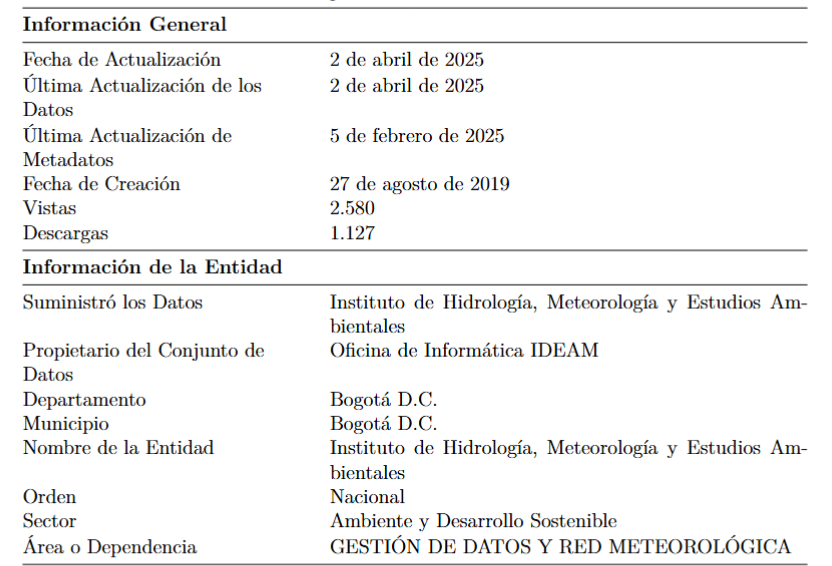

<center>
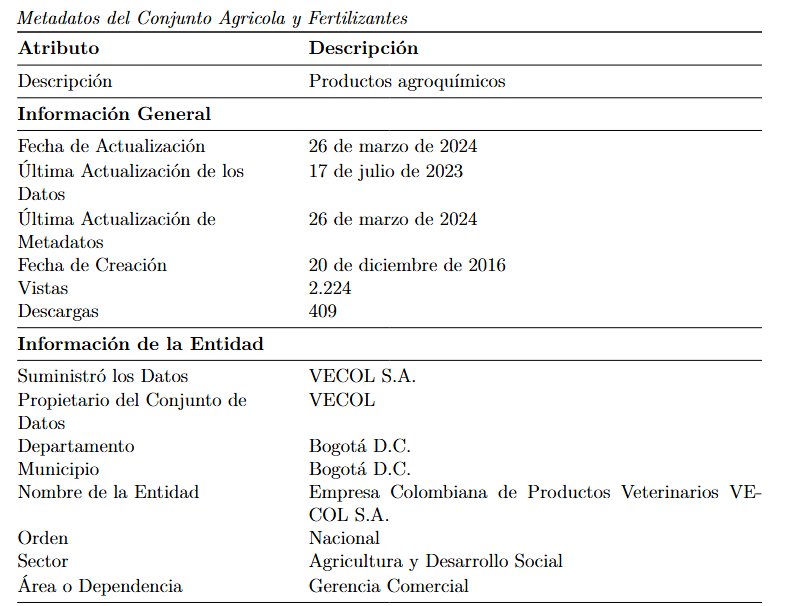

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
# importaciones
import pandas as pd
df = pd.read_csv('../Datos/Actual/Precipitación.csv', sep=',')
df.head()

,CodigoEstacion,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor
0,23125160,10/07/2009 02:10:00 AM,0.1,SAN PABLO DE BORBUR - AUT,BOYACÁ,SAN PABLO DE BORBUR,MEDIO MAGDALENA,5.647028,-74.071306,Precipitacion
1,24035410,12/17/2012 03:10:00 AM,0.0,SOGAMOSO - AUT,BOYACÁ,SOGAMOSO,SOGAMOSO,5.753333,-72.911153,Precipitacion
2,23125501,03/21/2019 07:10:00 PM,0.0,PAUNA - AUT,BOYACÁ,PAUNA,MEDIO MAGDALENA,5.657131,-73.960328,Precipitacion
3,35085070,07/28/2018 02:30:00 AM,0.0,SANTA MARIA - AUT,BOYACÁ,SANTA MARÍA,META,4.841250,-73.256694,Precipitacion
4,24035410,01/20/2018 05:37:00 AM,0.0,SOGAMOSO - AUT,BOYACÁ,SOGAMOSO,SOGAMOSO,5.753333,-72.911153,Precipitacion


In [16]:
#información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15081188 entries, 0 to 15081187
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CodigoEstacion     int64  
 1   FechaObservacion   object 
 2   ValorObservado     float64
 3   NombreEstacion     object 
 4   Departamento       object 
 5   Municipio          object 
 6   ZonaHidrografica   object 
 7   Latitud            float64
 8   Longitud           float64
 9   DescripcionSensor  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.1+ GB


In [17]:
df['Departamento'].unique()
df['DescripcionSensor'].unique()

array(['Precipitacion', 'PRECIPITACIÓN', 'GPRS - PRECIPITACIÓN'],
      dtype=object)

In [18]:
df.drop(columns=['Departamento','DescripcionSensor','CodigoEstacion'], inplace=True)

In [19]:
df['FechaObservacion'] = pd.to_datetime(df['FechaObservacion'], format='%m/%d/%Y %I:%M:%S %p')

In [12]:
df_final = df[df['FechaObservacion'] >= '2019-01-01 00:00:00']

In [22]:
df_final = df_final[['FechaObservacion', 'ValorObservado','NombreEstacion','Municipio','ZonaHidrografica']]

Dado que nuestro conjuto de datos base  esta definido entre los periodo 2019 a 2023, se decide filtrar los datos y justarlos en ese periodo

In [23]:
row_writter  = len(df_final.index)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11120256 entries, 2 to 15081187
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   FechaObservacion  datetime64[ns]
 1   ValorObservado    float64       
 2   NombreEstacion    object        
 3   Municipio         object        
 4   ZonaHidrografica  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 509.0+ MB


Save de datos procesado y que continuan para el proceso de modelado

In [24]:
path_procces = '../Datos/Procesados/Precipitacion.csv'
df_final.to_csv(path_procces ,sep=';', index=False)
print(f'Se guardaron {row_writter} registros en la ruta {path_procces}')

Se guardaron 11120256 registros en la ruta ../Datos/Procesados/Precipitacion.csv
